In [21]:
# Getting the data ready
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


# Modelling 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Getting the Random seed ready
import numpy as np 
np.random.seed(42)

# Display data and explor it
import matplotlib.pyplot as plt
import seaborn as sns

# Evalate the data and the model 
from sklearn.metrics import accuracy_score

## 1. Fatch the  data and preprocess it 

In [2]:
data = pd.read_csv("./data/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [4]:
data.dropna()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
data.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

C:\Users\Zeyad\AppData\Local\Temp\ipykernel_17788\3776810560.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="weather", palette="hls")


<Axes: xlabel='weather', ylabel='count'>

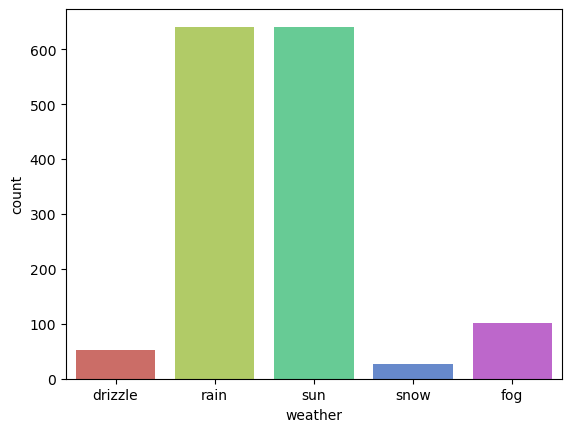

In [6]:
sns.countplot(data=data, x="weather", palette="hls")

In [7]:
countrain = len(data[data.weather == "rain"])
countsun = len(data[data.weather == "sun"])
countdrizzle = len(data[data.weather == "drizzle"])
countsnow = len(data[data.weather == "snow"])
countfog = len(data[data.weather == "fog"])
##############################################################################
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


In [8]:
data_droped = data.drop("date", axis=1)
data_droped

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


## 2.Convort all the str to number (using Pipline)

In [9]:
lc = LabelEncoder()
data_droped["weather"] = lc.fit_transform(data_droped["weather"])
data_droped.head(30)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
5,2.5,4.4,2.2,2.2,2
6,0.0,7.2,2.8,2.3,2
7,0.0,10.0,2.8,2.0,4
8,4.3,9.4,5.0,3.4,2
9,1.0,6.1,0.6,3.4,2


## 3.Chose the model and split the data and fit the model (using pipline)

In [10]:
model = GradientBoostingClassifier()

X = data_droped.drop("weather", axis=1)
y = data_droped["weather"] 

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(1168, 4) (293, 4) (1168,) (293,)


In [11]:
model.fit(xTrain, yTrain)

GradientBoostingClassifier()

In [12]:
model.score(xTest,yTest)

0.8156996587030717

## 4.Tuning the model 

In [13]:
grid = {
    "loss" : ["log_loss", "exponential"],
    "learning_rate" : [0.1, 0.2, 0.3],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, None],
    "min_samples_split": [2, 5, 10],
    "max_features": ['auto', 'sqrt']
}

In [15]:
model_improve = GridSearchCV(estimator=GradientBoostingClassifier(), 
                             param_grid=grid, cv=5, scoring="accuracy", verbose=2)
model_improve.fit(xTrain, yTrain)
print(model_improve.best_params_, model_improve.best_estimator_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] 

[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=3, max_features=

[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=5, max_features=

[CV] END learning_rate=0.1, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   7.7s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   7.6s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END learning_rate=0.1, loss=log_loss, max_d

[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=auto, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=auto, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=auto, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=5, max_features=auto, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, ma

[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1,

[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.1, loss=exponential, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3,

[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=3, max_features=

[CV] END learning_rate=0.2, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=5, max_features=

[CV] END learning_rate=0.2, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END learning_rate=0.2, loss=log_loss, max_d

[CV] END learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, ma

[CV] END learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, 

[CV] END learning_rate=0.2, loss=exponential, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.2, loss=exponential, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3,

[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=3, max_features=

[CV] END learning_rate=0.3, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=5, max_features=

[CV] END learning_rate=0.3, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END learning_rate=0.3, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END learning_rate=0.3, loss=log_loss, max_d

[CV] END learning_rate=0.3, loss=exponential, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=5, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, ma

[CV] END learning_rate=0.3, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.3, loss=exponential, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END learning_rate=0.3,

C:\Users\Zeyad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1215 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zeyad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zeyad\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Zeyad\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Zeyad\anaconda3\lib\site-pack

{'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100} GradientBoostingClassifier(max_features='sqrt', min_samples_split=10)


In [25]:
model_predicted = model_improve.predict(xTest)
model_improve.score(xTest, yTest)

0.825938566552901

In [38]:
input = [[0.0, 15.2, 7.8, 3.6]]

ot = model_improve.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Sun


C:\Users\Zeyad\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [39]:
import pickle

pickle.dump(model_improve, open("Weather_model", "wb"))

In [ ]:
my_model = pickle.load(open("Weather_model", "rb"))
my_model